Explore data

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/large_organic_health_food_store.csv"
df = pd.read_csv(file_path)
# Display basic information
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())

# Check data types
print(df.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      100 non-null    int64  
 1   Product Name    100 non-null    object 
 2   Category        100 non-null    object 
 3   Price ($)       100 non-null    float64
 4   Stock Quantity  100 non-null    int64  
 5   Sales           100 non-null    int64  
 6   Organic         100 non-null    bool   
 7   Supplier        100 non-null    object 
 8   Expiry Date     100 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 6.5+ KB
None
   Product ID   Product Name     Category  Price ($)  Stock Quantity  Sales  \
0           1  Organic Honey        Seeds      28.35             156   1191   
1           2  Pumpkin Seeds         Oils      36.64              13    609   
2           3        Spinach  Supplements      21.36              44   1674   
3         

Handle missing value

In [ ]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical columns
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-18-4094fb83c47b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-18-4094fb83c47b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Remove Duplicate

In [ ]:
df = df.drop_duplicates()


Fix data type

In [ ]:
# Convert date columns to datetime
date_cols = df.select_dtypes(include=['object']).columns.tolist() # Get all object type columns as potential date columns
# Check if the desired date column is present and remove if not
if 'date_column' in date_cols:  # Check if 'date_column' is in date_cols before removing
    date_cols.remove('date_column')
#If the desired column is present then convert it to datetime
elif 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

# Convert other object type columns to category
categorical_cols = [col for col in date_cols if col != 'date_column']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Handle Outliers

In [ ]:
# Remove outliers using IQR
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Normalize/scale data

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Save cleaned dataset

In [ ]:
df.to_csv("/content/cleaned_organic_health_food_store.csv", index=False)


EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "/content/cleaned_organic_health_food_store.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      100 non-null    float64
 1   Product Name    100 non-null    object 
 2   Category        100 non-null    object 
 3   Price ($)       100 non-null    float64
 4   Stock Quantity  100 non-null    float64
 5   Sales           100 non-null    float64
 6   Organic         100 non-null    bool   
 7   Supplier        100 non-null    object 
 8   Expiry Date     100 non-null    object 
dtypes: bool(1), float64(4), object(4)
memory usage: 6.5+ KB


,Product ID,Product Name,Category,Price ($),Stock Quantity,Sales,Organic,Supplier,Expiry Date
0,-1.714816,Organic Honey,Seeds,0.083040,0.053769,0.189119,True,Supplier B,2024-06-01 00:00:00
1,-1.680173,Pumpkin Seeds,Oils,0.734814,-1.670228,-0.895287,True,Supplier B,2024-06-02 00:00:00
2,-1.645531,Spinach,Supplements,-0.466525,-1.296494,1.089064,False,Supplier E,2024-06-03 00:00:00
3,-1.610888,Oats,Vegetables,1.685349,0.596286,-1.029441,False,Supplier C,2024-06-04 00:00:00
4,-1.576245,Brown Rice,Seeds,1.652328,-1.127711,0.410845,True,Supplier E,2024-06-05 00:00:00


In [ ]:
# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['object', 'category']))


         Product ID     Price ($)  Stock Quantity         Sales
count  1.000000e+02  1.000000e+02    1.000000e+02  1.000000e+02
mean  -4.440892e-18 -5.107026e-17    7.327472e-17 -4.440892e-18
std    1.005038e+00  1.005038e+00    1.005038e+00  1.005038e+00
min   -1.714816e+00 -1.734692e+00   -1.706395e+00 -1.916343e+00
25%   -8.574080e-01 -8.967819e-01   -9.679701e-01 -8.994795e-01
50%    0.000000e+00  1.019094e-01   -4.822369e-04  5.310236e-02
75%    8.574080e-01  7.428722e-01    6.083419e-01  8.151678e-01
max    1.714816e+00  1.734094e+00    1.777766e+00  1.661079e+00
       Product Name Category    Supplier          Expiry Date
count           100      100         100                  100
unique           20        8           5                  100
top      Brown Rice    Seeds  Supplier E  2024-06-01 00:00:00
freq              9       16          24                    1


Product ID        0
Product Name      0
Category          0
Price ($)         0
Stock Quantity    0
Sales             0
Organic           0
Supplier          0
Expiry Date       0
dtype: int64


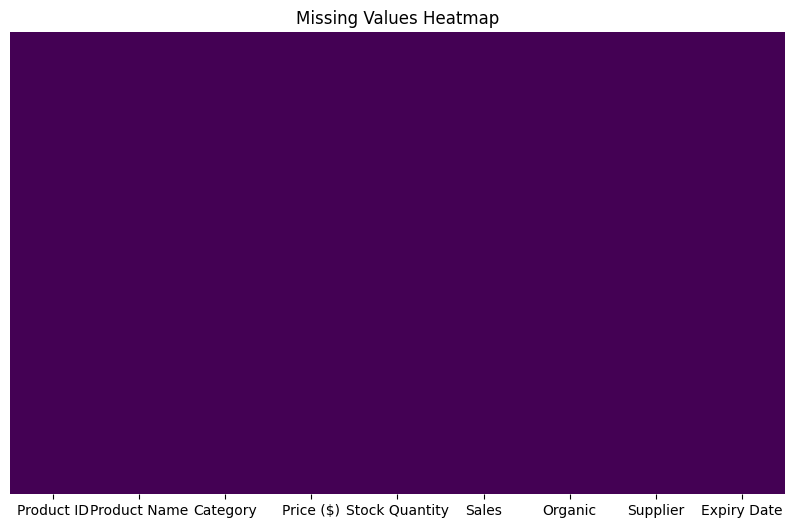

In [ ]:
# Missing value count
print(df.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


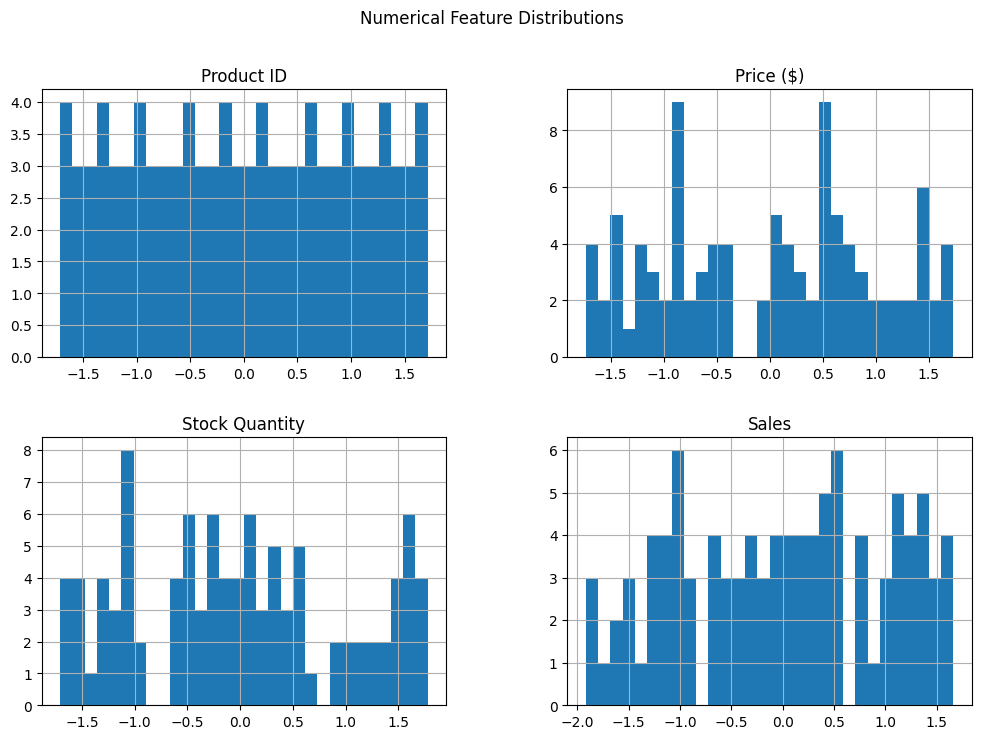

In [ ]:
# Histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()


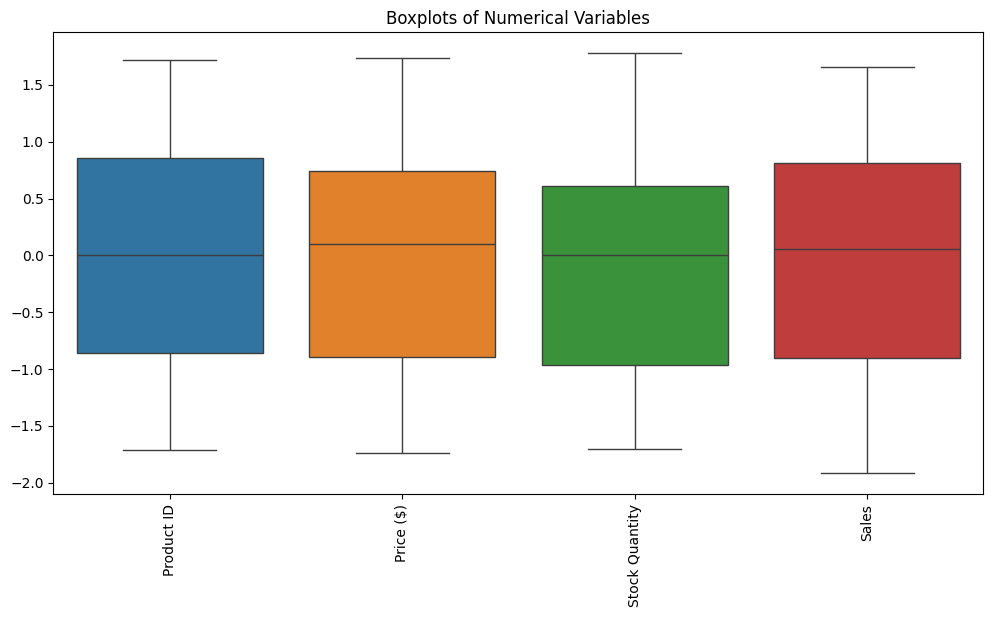

In [ ]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Variables")
plt.show()


<ipython-input-31-b12aa8b6cbd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


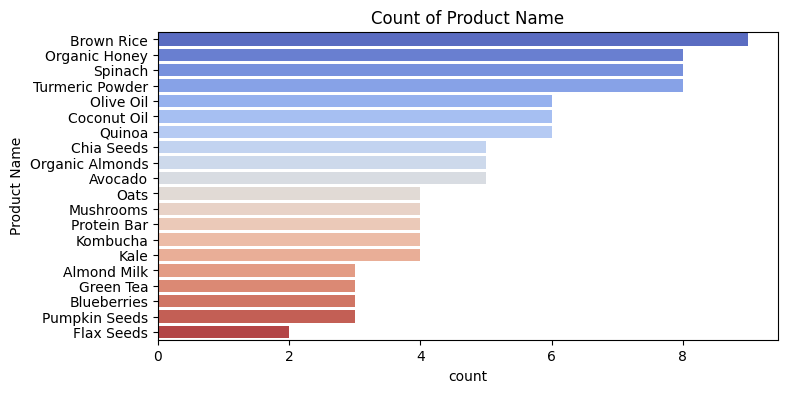

<ipython-input-31-b12aa8b6cbd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


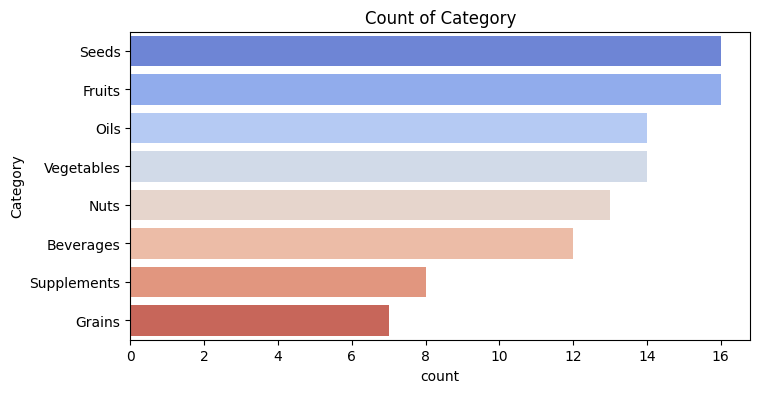

<ipython-input-31-b12aa8b6cbd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


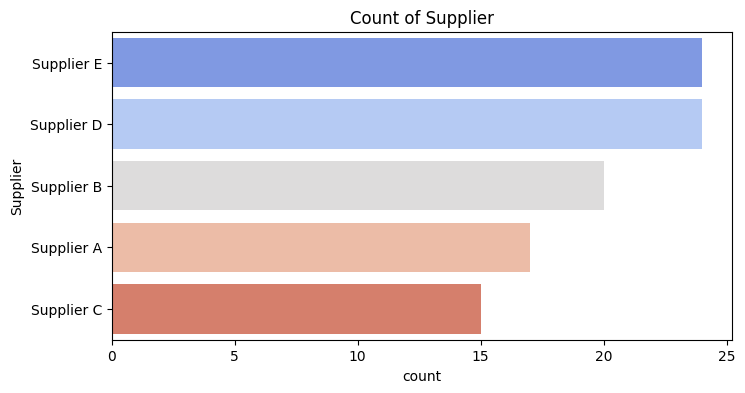

<ipython-input-31-b12aa8b6cbd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


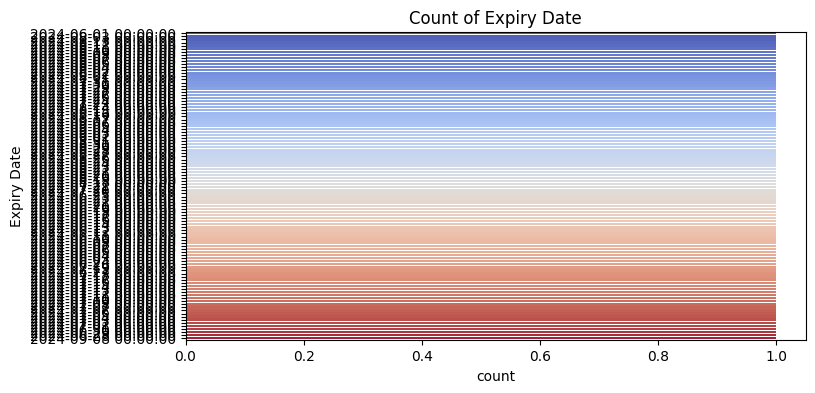

In [ ]:
# Countplot of categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Count of {col}")
    plt.show()


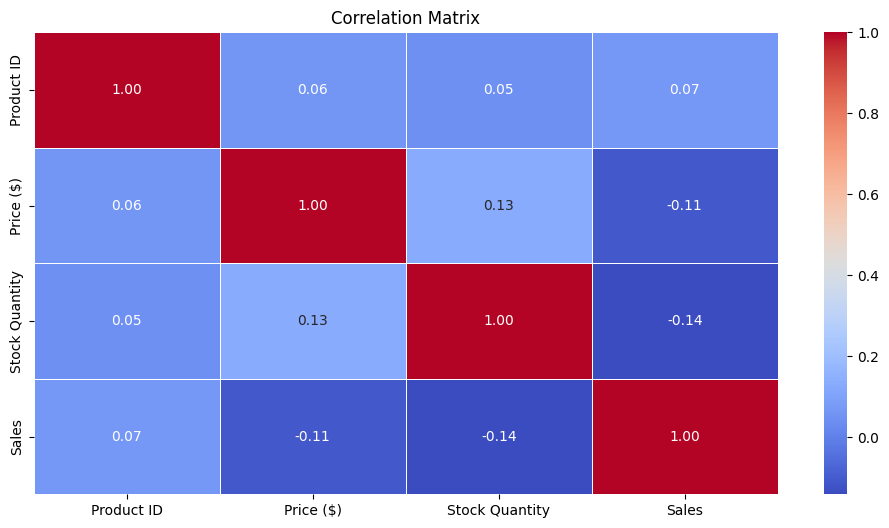

In [ ]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()